In [135]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time

In [138]:
df = pd.read_csv("/content/drive/My Drive/ColabNotebooks/MachineLearning/RandomForest/RFRegressor/data.csv")

In [139]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [140]:
df.shape

(62184, 11)

In [141]:
df['temperature'].value_counts()

58.00    823
56.00    801
62.00    766
60.00    697
57.00    637
        ... 
43.01      1
46.52      1
42.39      1
42.22      1
51.34      1
Name: temperature, Length: 2599, dtype: int64

In [142]:
df['month'].value_counts()

12    7477
10    7264
11    7110
9     6914
8     6089
7     4447
3     4333
5     4230
1     4046
6     3940
2     3587
4     2747
Name: month, dtype: int64

In [143]:
df['hour'].value_counts()

0     2978
17    2911
23    2870
18    2837
19    2819
13    2812
16    2808
12    2805
9     2799
8     2798
10    2796
20    2795
7     2791
11    2791
14    2787
21    2779
15    2778
22    2775
6     2758
5     2441
1     1782
2     1520
3     1517
4     1437
Name: hour, dtype: int64

In [144]:
df['number_people'].value_counts()

0      8775
1      3029
29     1229
31     1215
27     1192
       ... 
145       1
123       1
121       1
125       1
138       1
Name: number_people, Length: 128, dtype: int64

In [145]:
df['day_of_week'].value_counts()

1    9130
2    8981
3    8926
0    8838
5    8822
6    8768
4    8719
Name: day_of_week, dtype: int64

In [146]:
df['timestamp'].value_counts()

51612    93
69612    88
84612    88
62412    85
22812    85
         ..
77050     1
74617     1
73400     1
72791     1
69771     1
Name: timestamp, Length: 31321, dtype: int64

In [147]:
df['is_during_semester'].value_counts()

1    41055
0    21129
Name: is_during_semester, dtype: int64

In [148]:
df['is_start_of_semester'].value_counts()

0    57282
1     4902
Name: is_start_of_semester, dtype: int64

In [149]:
df['is_holiday'].value_counts()

0    62024
1      160
Name: is_holiday, dtype: int64

In [150]:
df['is_weekend'].value_counts()

0    44594
1    17590
Name: is_weekend, dtype: int64

In [151]:
df.duplicated().sum()

0

In [152]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [154]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_people,62184.0,29.072543,22.689026,0.00,9.0,28.00,43.00,145.00
timestamp,62184.0,45799.437958,24211.275891,0.00,26624.0,46522.50,66612.00,86399.00
day_of_week,62184.0,2.982504,1.996825,0.00,1.0,3.00,5.00,6.00
is_weekend,62184.0,0.282870,0.450398,0.00,0.0,0.00,1.00,1.00
is_holiday,62184.0,0.002573,0.050660,0.00,0.0,0.00,0.00,1.00
temperature,62184.0,58.557108,6.316396,38.14,55.0,58.34,62.28,87.17
is_start_of_semester,62184.0,0.078831,0.269476,0.00,0.0,0.00,0.00,1.00
is_during_semester,62184.0,0.660218,0.473639,0.00,0.0,1.00,1.00,1.00
month,62184.0,7.439824,3.445069,1.00,5.0,8.00,10.00,12.00
hour,62184.0,12.236460,6.717631,0.00,7.0,12.00,18.00,23.00


In [156]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [157]:
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second

In [158]:
# Drop columns
df = df.drop("date", axis=1)

In [159]:
df.head(40)

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17
5,46,64818,4,0,0,72.15,0,0,8,18
6,43,66008,4,0,0,72.15,0,0,8,18
7,53,66609,4,0,0,72.15,0,0,8,18
8,54,67214,4,0,0,72.15,0,0,8,18
9,43,67815,4,0,0,72.15,0,0,8,18


In [160]:
df.columns

Index(['number_people', 'timestamp', 'day_of_week', 'is_weekend', 'is_holiday',
       'temperature', 'is_start_of_semester', 'is_during_semester', 'month',
       'hour'],
      dtype='object')

In [161]:
# center timestamp
noon = time_to_seconds(time(12, 0, 0))
df.timestamp = df.timestamp.apply(lambda t: abs(noon - t))

In [162]:
# one hot encode categorical columns
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,18011,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,45,19214,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40,19815,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44,20416,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,21017,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,46,21618,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,43,22808,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,53,23409,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,54,24014,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,43,24615,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [163]:
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [164]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [165]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)    # estimators means features
scores = []

In [166]:
for n in estimators:
    model.set_params(n_estimators=n)   # n_estimators means  total  indepemdent feature in the database
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

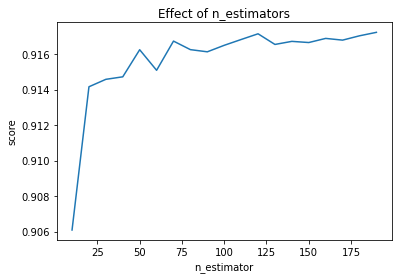

In [167]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

#Accuracy of each feature:

In [168]:
scores

[0.9060978558901307,
 0.9141622080413693,
 0.9145811900355417,
 0.9147221243221357,
 0.9162473593167129,
 0.9150896395943522,
 0.9167334907984498,
 0.9162523290483077,
 0.9161300486203072,
 0.9164960899273518,
 0.9168227334956865,
 0.9171443997763156,
 0.9165451509405823,
 0.9167178825498224,
 0.9166524980034216,
 0.9168847709955565,
 0.9167877335228011,
 0.9170312056046855,
 0.9172264639522549]

In [169]:
type(scores)

list

#Average Accuracy

In [173]:
sum = sum(scores)

In [175]:
sum

17.398325174435787

In [174]:
n = len(scores)

In [176]:
n

19

In [177]:
average = sum/n

In [178]:
average

0.9157013249703045

In [181]:
print("The average accuracy is ",average*100)

The average accuracy is  91.57013249703046


In [182]:
type(average)

numpy.float64